In [6]:
#importing the libiraries 
import requests 
import pandas as pd 
import time 
from dateutil import parser
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image
import mysql.connector
from mysql.connector import Error
import googleapiclient
from googleapiclient.discovery import build

In [7]:
#API KEY
API_KEY = "your key" # from https://console.cloud.google.com/apis/dashboard?project=youtubeproject-375411
channel_ID = "UCpcTrCXblq78GZrTUTLWeBw" #select the channel you want or multiple channels

In [8]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = googleapiclient.discovery.build(
api_service_name, api_version, developerKey=API_KEY)
request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id=channel_ID
     )
response = request.execute()
print(response)

{'kind': 'youtube#channelListResponse', 'etag': '0Z8xooMLJCgKYqrLp-QKZDlCXfw', 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': 'koYHWFKMhH4HkqzKqqUlOMmkm98', 'id': 'UCpcTrCXblq78GZrTUTLWeBw', 'snippet': {'title': 'FIFA', 'description': "FIFA on YouTube brings you the best in football videos, including FIFA World Cup™ and FIFA Women's World Cup™ highlights, full matches, classic stories, exclusive interviews, famous goals, documentaries and behind the scenes coverage of all FIFA's tournaments and events. Subscribe, follow and watch great soccer videos on all devices.", 'customUrl': '@fifa', 'publishedAt': '2006-09-06T03:52:41Z', 'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/3ixxeWPWIp6tKoE4iQD5aBj4QYEtlmXpFcGKEXu0mlbqmV_z9Lvw9MoYoKCm2Cx8rKP67QmZF3E=s88-c-k-c0x00ffffff-no-rj', 'width': 88, 'height': 88}, 'medium': {'url': 'https://yt3.ggpht.com/3ixxeWPWIp6tKoE4iQD5aBj4QYEtlmXpFcGKEXu0mlbqmV_z9Lvw9MoYoKCm2Cx8rKP67QmZF3E=s240-c

In [9]:
def channel_status(youtube,channel_id):  
   # Get credentials and create an API client
    all_videos = []
    request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id=channel_ID
     )
    response = request.execute()
    for item in response['items']:
        data = {'subscribes':item['statistics']['subscriberCount'],
                'views':item['statistics']['viewCount'],
                'totalvideos':item['statistics']['videoCount'],
                'playlistid':item['contentDetails']['relatedPlaylists']['uploads']}
        all_videos.append(data)
    return (pd.DataFrame(all_videos))

In [10]:
dataset = channel_status(youtube,channel_ID)

In [11]:
dataset.head()

,subscribes,views,totalvideos,playlistid
0,18700000,5139562145,10454,UUpcTrCXblq78GZrTUTLWeBw


In [12]:
request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId="UUpcTrCXblq78GZrTUTLWeBw"
    )
response = request.execute()
print(response)

{'kind': 'youtube#playlistItemListResponse', 'etag': '5IP245HgXMAJvun-CEEZXz5ZbWE', 'nextPageToken': 'EAAaBlBUOkNBVQ', 'items': [{'kind': 'youtube#playlistItem', 'etag': 'yFG6eCnMw3Jkrzi3v47ffsI3ZcU', 'id': 'VVVwY1RyQ1hibHE3OEdaclRVVExXZUJ3LkJxdkVvcjlyUGxv', 'snippet': {'publishedAt': '2023-02-05T12:06:17Z', 'channelId': 'UCpcTrCXblq78GZrTUTLWeBw', 'title': 'Welcome to Morocco – Official Song of the FIFA Club World Cup 2022™', 'description': "Welcome to Morocco – Official Song of the FIFA Club World Cup 2022, featuring: Aminux, Asmae, Dizzy Dros, Douzi, Hatim, Nouamane, Rym and Zouhair. Produced by RedOne.\n\nStream the song NOW!: https://fifasoundd.lnk.to/WelcometoMorocco\n\nWatch the opening ceremony performance on FIFA+: https://www.fifa.com/fifaplus/en/watch/gXOPDq5E0UKx2H6l8k8aIA\n\nFollow the #ClubWC on FIFA+ ➡️ https://www.fifa.com/fifaplus/en/tournaments/mens/fifa-club-world-cup/morocco-2022 \n\nFollow FIFA World Cup & FIFA Women's World Cup:\n👉 https://www.instagram.com/fifawo

In [13]:
playlist_id = "UUpcTrCXblq78GZrTUTLWeBw"
def get_video_ids(youtube,playlist_id):
    video_ids = []
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId = playlist_id ,
        maxResults = 50 #as per documentation max results 50
    )
    response = request.execute()
    
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken') #to return all pages 
    while next_page_token is not None:
        request = youtube.playlistItems().list(
                    part="contentDetails",
                    playlistId = playlist_id ,
                    maxResults = 50,
                    pageToken = next_page_token)    
        response = request.execute()
        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])
        
        next_page_token = response.get('nextPageToken')
        
    return video_ids   
        


In [14]:
video_ids = get_video_ids(youtube,playlist_id)

In [15]:
len(video_ids)

10457

In [16]:
video_ids

['BqvEor9rPlo',
 'A3Jv5ugO4Gs',
 '_iHdam3PTKk',
 'FFD_huW--8I',
 'PCMmSG6n1nk',
 'ngPjfZWFP3I',
 'i12Ap5t4heQ',
 'sYNjfNvyg8M',
 'n3tDrazuJOA',
 'XAjEmp50xb4',
 'qvaJhsr49RM',
 'SN3trw0hA9A',
 'gP-oAIr5LMw',
 'HnxIHscBr00',
 'bhOvjiTL-Cw',
 'emeymChWypI',
 'DpONfxDJfWU',
 'pEwwC3y0yJ4',
 'aIbBkF5K82w',
 'wAduQg-asaU',
 'GjA9h_E1Bro',
 'lTIF4p6Pshc',
 'fAkKmvqIl48',
 '3E7E-aPPLsQ',
 '2u5g3qCj4K0',
 'HN_q5TWugPE',
 '-YsQPHK3QXQ',
 'TtrP6tTdEmw',
 'SNKsAaJAsI4',
 'AOmpL-etGvk',
 'iEPxe5c282E',
 'SirRnkDOrlU',
 '0lcMzOv9EN8',
 'n4uF0-7GHf4',
 '-ds6UKYH53s',
 'fpLG533zVTY',
 '6Pxq_eAwQw4',
 'EEoqsOslVQ8',
 'pjv6BNR8O58',
 'NyJeKxqqOS0',
 'KIlv8UkyyDU',
 'UDh00hSjq3c',
 'IJpEYLh1N-Q',
 'IqIvIZdKPl4',
 'KrPLSdoiFCY',
 'DEG1rCVTA-U',
 '0W_DAsKwO3c',
 '_XccCaPxTTI',
 'UCs3a1aJL_s',
 'dy7GV-rhhOE',
 'YAJyt4DBr0Y',
 'z6TJYwK204Y',
 '5PypOqZaChQ',
 'SJzPQXAngew',
 'tLslECATd2U',
 '5QE0J8rRd_w',
 'EV9U3tDOWv0',
 'Vh3Ei1ROAGY',
 'XNJhcsMfWeg',
 'iTivhSMW6As',
 'ivIEpb3U_RI',
 '2lhJ26xkfag',
 'PsH2qI

In [17]:
# getting the statistics information required
def videos_details(youtube,video_ids):
    
    all_videos = []
    
    for i in range (0,len(video_ids),50):
        request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        id=','.join(video_ids[i:i+50])
       )
        response = request.execute()
    
        for video in response['items']:
            req_stats = {'snippet':['title','description','publishedAt'],
                'statistics':['viewCount','likeCount','commentCount'],
                 'contentDetails':['duration']}
            video_info = {}
            video_info['video_id'] = video['id']
            for k in req_stats.keys():
                for v in req_stats[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None
            all_videos.append(video_info) 
    
    return pd.DataFrame(all_videos)

In [18]:
dataset = videos_details(youtube,video_ids)
dataset

,video_id,title,description,publishedAt,viewCount,likeCount,commentCount,duration
0,BqvEor9rPlo,Welcome to Morocco – Official Song of the FIFA...,Welcome to Morocco – Official Song of the FIFA...,2023-02-05T12:06:17Z,1822,609,117,PT4M29S
1,A3Jv5ugO4Gs,A quick flick to celebrate heading to the #Clu...,#Shorts #Short #ClubWC #AlHilal,2023-02-04T18:37:43Z,17083,1017,20,PT12S
2,_iHdam3PTKk,Wydad Casablanca have really brought the ATMOS...,Follow the #ClubWC on FIFA+ ➡️ https://www.fif...,2023-02-04T15:25:54Z,14521,1066,25,PT19S
3,FFD_huW--8I,Costa Rican side SHOCK the #ClubWC! 🇨🇷 | #Shorts,🇨🇷🥉 Deportivo Saprissa were the last non-Mexic...,2023-02-04T03:00:13Z,20527,1052,8,PT31S
4,PCMmSG6n1nk,💪🔴⚫ Flamengo are here. Flamengo are ready. #Cl...,Follow the #ClubWC on FIFA+ ➡️ https://www.fif...,2023-02-03T21:22:15Z,12420,921,12,PT20S
...,...,...,...,...,...,...,...,...
10452,t1hdhfygF3Y,1-on-1 with Juan Mata,"A FIFA World Cup winner with Spain, Juan Mata ...",2012-03-16T13:14:57Z,2832,37,5,PT1M12S
10453,cB92kiNbKzs,TOP 10 GOALS | FIFA U-20 World Cup Colombia 2011,The U-20 World Cup produced many moments of sh...,2012-03-15T19:00:30Z,849831,5456,235,PT4M20S
10454,hB0BgF5vtdw,TOP 10 GOALS | FIFA U-17 World Cup Mexico 2011,The U-17 World Cup produced a bag full of amaz...,2012-03-15T19:00:07Z,879817,4691,230,PT4M36S
10455,JwNkXPRyi-Q,"Uzbekistan - Australia, Mexico 2011",Abbosbek Makhstaliev's opener was all class fo...,2012-03-15T18:59:28Z,132358,1191,59,PT3M2S


# Data cleaning

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10457 entries, 0 to 10456
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   video_id      10457 non-null  object
 1   title         10457 non-null  object
 2   description   10457 non-null  object
 3   publishedAt   10457 non-null  object
 4   viewCount     10457 non-null  object
 5   likeCount     10401 non-null  object
 6   commentCount  10441 non-null  object
 7   duration      10457 non-null  object
dtypes: object(8)
memory usage: 653.7+ KB


In [67]:
dataset['likeCount'] = dataset['likeCount'].fillna(0)
dataset['commentCount'] = dataset['commentCount'].fillna(0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10457 entries, 0 to 10456
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   video_id      10457 non-null  object        
 1   title         10457 non-null  object        
 2   description   10457 non-null  object        
 3   publishedAt   10457 non-null  datetime64[ns]
 4   viewCount     10457 non-null  float64       
 5   likeCount     10457 non-null  float64       
 6   commentCount  10457 non-null  float64       
 7   duration      10457 non-null  object        
 8   durationSecs  10457 non-null  float64       
 9   length        10457 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 817.1+ KB


In [63]:
dataset.describe()

,viewCount,likeCount,commentCount,durationSecs
count,1.045700e+04,1.040100e+04,10441.000000,10457.000000
mean,4.916426e+05,6.107868e+03,317.087252,794.216028
std,3.283797e+06,6.239662e+04,3247.594338,2423.717304
min,0.000000e+00,2.000000e+00,0.000000,0.000000
25%,1.273100e+04,1.430000e+02,8.000000,65.000000
50%,4.125900e+04,5.070000e+02,33.000000,130.000000
75%,1.716360e+05,2.026000e+03,126.000000,273.000000
max,1.253548e+08,4.691892e+06,226881.000000,39138.000000


In [24]:
dataset['publishedAt'] =  pd.to_datetime(dataset['publishedAt'], infer_datetime_format=True)#removing the time zone
dataset

,video_id,title,description,publishedAt,viewCount,likeCount,commentCount,duration
0,BqvEor9rPlo,Welcome to Morocco – Official Song of the FIFA...,Welcome to Morocco – Official Song of the FIFA...,2023-02-05 12:06:17,1822,609,117,PT4M29S
1,A3Jv5ugO4Gs,A quick flick to celebrate heading to the #Clu...,#Shorts #Short #ClubWC #AlHilal,2023-02-04 18:37:43,17083,1017,20,PT12S
2,_iHdam3PTKk,Wydad Casablanca have really brought the ATMOS...,Follow the #ClubWC on FIFA+ ➡️ https://www.fif...,2023-02-04 15:25:54,14521,1066,25,PT19S
3,FFD_huW--8I,Costa Rican side SHOCK the #ClubWC! 🇨🇷 | #Shorts,🇨🇷🥉 Deportivo Saprissa were the last non-Mexic...,2023-02-04 03:00:13,20527,1052,8,PT31S
4,PCMmSG6n1nk,💪🔴⚫ Flamengo are here. Flamengo are ready. #Cl...,Follow the #ClubWC on FIFA+ ➡️ https://www.fif...,2023-02-03 21:22:15,12420,921,12,PT20S
...,...,...,...,...,...,...,...,...
10452,t1hdhfygF3Y,1-on-1 with Juan Mata,"A FIFA World Cup winner with Spain, Juan Mata ...",2012-03-16 13:14:57,2832,37,5,PT1M12S
10453,cB92kiNbKzs,TOP 10 GOALS | FIFA U-20 World Cup Colombia 2011,The U-20 World Cup produced many moments of sh...,2012-03-15 19:00:30,849831,5456,235,PT4M20S
10454,hB0BgF5vtdw,TOP 10 GOALS | FIFA U-17 World Cup Mexico 2011,The U-17 World Cup produced a bag full of amaz...,2012-03-15 19:00:07,879817,4691,230,PT4M36S
10455,JwNkXPRyi-Q,"Uzbekistan - Australia, Mexico 2011",Abbosbek Makhstaliev's opener was all class fo...,2012-03-15 18:59:28,132358,1191,59,PT3M2S


In [25]:
import isodate #converting time to sec
dataset['durationSecs'] = dataset['duration'].apply(lambda x: isodate.parse_duration(x))
dataset['durationSecs'] = dataset['durationSecs'].astype('timedelta64[s]')
dataset

,video_id,title,description,publishedAt,viewCount,likeCount,commentCount,duration,durationSecs
0,BqvEor9rPlo,Welcome to Morocco – Official Song of the FIFA...,Welcome to Morocco – Official Song of the FIFA...,2023-02-05 12:06:17,1822,609,117,PT4M29S,269.0
1,A3Jv5ugO4Gs,A quick flick to celebrate heading to the #Clu...,#Shorts #Short #ClubWC #AlHilal,2023-02-04 18:37:43,17083,1017,20,PT12S,12.0
2,_iHdam3PTKk,Wydad Casablanca have really brought the ATMOS...,Follow the #ClubWC on FIFA+ ➡️ https://www.fif...,2023-02-04 15:25:54,14521,1066,25,PT19S,19.0
3,FFD_huW--8I,Costa Rican side SHOCK the #ClubWC! 🇨🇷 | #Shorts,🇨🇷🥉 Deportivo Saprissa were the last non-Mexic...,2023-02-04 03:00:13,20527,1052,8,PT31S,31.0
4,PCMmSG6n1nk,💪🔴⚫ Flamengo are here. Flamengo are ready. #Cl...,Follow the #ClubWC on FIFA+ ➡️ https://www.fif...,2023-02-03 21:22:15,12420,921,12,PT20S,20.0
...,...,...,...,...,...,...,...,...,...
10452,t1hdhfygF3Y,1-on-1 with Juan Mata,"A FIFA World Cup winner with Spain, Juan Mata ...",2012-03-16 13:14:57,2832,37,5,PT1M12S,72.0
10453,cB92kiNbKzs,TOP 10 GOALS | FIFA U-20 World Cup Colombia 2011,The U-20 World Cup produced many moments of sh...,2012-03-15 19:00:30,849831,5456,235,PT4M20S,260.0
10454,hB0BgF5vtdw,TOP 10 GOALS | FIFA U-17 World Cup Mexico 2011,The U-17 World Cup produced a bag full of amaz...,2012-03-15 19:00:07,879817,4691,230,PT4M36S,276.0
10455,JwNkXPRyi-Q,"Uzbekistan - Australia, Mexico 2011",Abbosbek Makhstaliev's opener was all class fo...,2012-03-15 18:59:28,132358,1191,59,PT3M2S,182.0


In [26]:
dataset['description'][1]

'#Shorts #Short #ClubWC #AlHilal'

In [27]:
numeric_cols = ['viewCount', 'likeCount', 'commentCount'] #converting objects to numeric coloumns
dataset[numeric_cols] = dataset[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

# EDA

<AxesSubplot:>

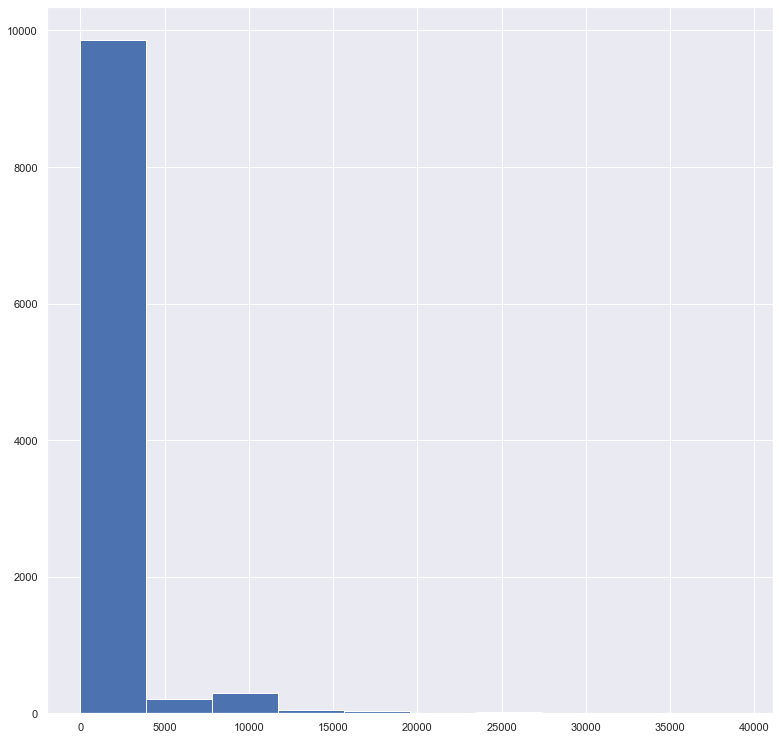

In [62]:
dataset['durationSecs'].hist()

In [40]:
#most of the viedos duration between 250 and 275 sec will make a new category to define videos into short and long videos 
def len(x):
    if (x) > 275:
        return 'long'
    else: return 'short'
dataset['length']  = dataset.durationSecs.apply(lambda x:len(x))  
dataset

,video_id,title,description,publishedAt,viewCount,likeCount,commentCount,duration,durationSecs,length
0,BqvEor9rPlo,Welcome to Morocco – Official Song of the FIFA...,Welcome to Morocco – Official Song of the FIFA...,2023-02-05 12:06:17,1822.0,609.0,117.0,PT4M29S,269.0,short
1,A3Jv5ugO4Gs,A quick flick to celebrate heading to the #Clu...,#Shorts #Short #ClubWC #AlHilal,2023-02-04 18:37:43,17083.0,1017.0,20.0,PT12S,12.0,short
2,_iHdam3PTKk,Wydad Casablanca have really brought the ATMOS...,Follow the #ClubWC on FIFA+ ➡️ https://www.fif...,2023-02-04 15:25:54,14521.0,1066.0,25.0,PT19S,19.0,short
3,FFD_huW--8I,Costa Rican side SHOCK the #ClubWC! 🇨🇷 | #Shorts,🇨🇷🥉 Deportivo Saprissa were the last non-Mexic...,2023-02-04 03:00:13,20527.0,1052.0,8.0,PT31S,31.0,short
4,PCMmSG6n1nk,💪🔴⚫ Flamengo are here. Flamengo are ready. #Cl...,Follow the #ClubWC on FIFA+ ➡️ https://www.fif...,2023-02-03 21:22:15,12420.0,921.0,12.0,PT20S,20.0,short
...,...,...,...,...,...,...,...,...,...,...
10452,t1hdhfygF3Y,1-on-1 with Juan Mata,"A FIFA World Cup winner with Spain, Juan Mata ...",2012-03-16 13:14:57,2832.0,37.0,5.0,PT1M12S,72.0,short
10453,cB92kiNbKzs,TOP 10 GOALS | FIFA U-20 World Cup Colombia 2011,The U-20 World Cup produced many moments of sh...,2012-03-15 19:00:30,849831.0,5456.0,235.0,PT4M20S,260.0,short
10454,hB0BgF5vtdw,TOP 10 GOALS | FIFA U-17 World Cup Mexico 2011,The U-17 World Cup produced a bag full of amaz...,2012-03-15 19:00:07,879817.0,4691.0,230.0,PT4M36S,276.0,long
10455,JwNkXPRyi-Q,"Uzbekistan - Australia, Mexico 2011",Abbosbek Makhstaliev's opener was all class fo...,2012-03-15 18:59:28,132358.0,1191.0,59.0,PT3M2S,182.0,short


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10457 entries, 0 to 10456
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   video_id      10457 non-null  object        
 1   title         10457 non-null  object        
 2   description   10457 non-null  object        
 3   publishedAt   10457 non-null  datetime64[ns]
 4   viewCount     10457 non-null  float64       
 5   likeCount     10401 non-null  float64       
 6   commentCount  10441 non-null  float64       
 7   duration      10457 non-null  object        
 8   durationSecs  10457 non-null  float64       
 9   length        10457 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 817.1+ KB


In [42]:
#count videos types
dataset['length'].value_counts()
dataset['length'] = dataset['length'].astype({'length':'str'})


In [43]:
dataset['length'].value_counts()

short    7877
long     2580
Name: length, dtype: int64

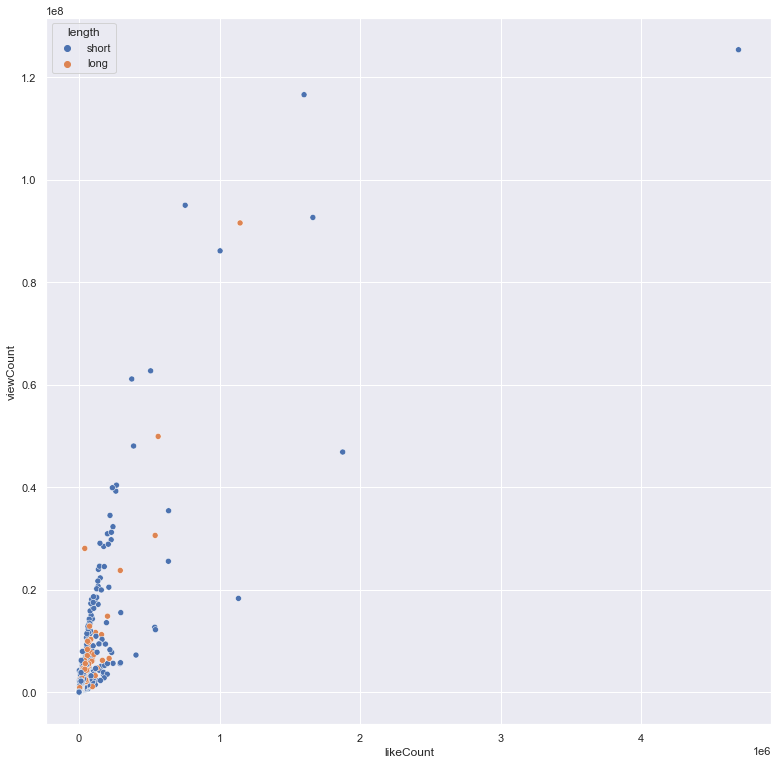

In [59]:
#views vs like on videos categories(shortvslong)
sns.scatterplot(data=dataset, x="likeCount", y="viewCount", hue="length")
sns.set_style("darkgrid")

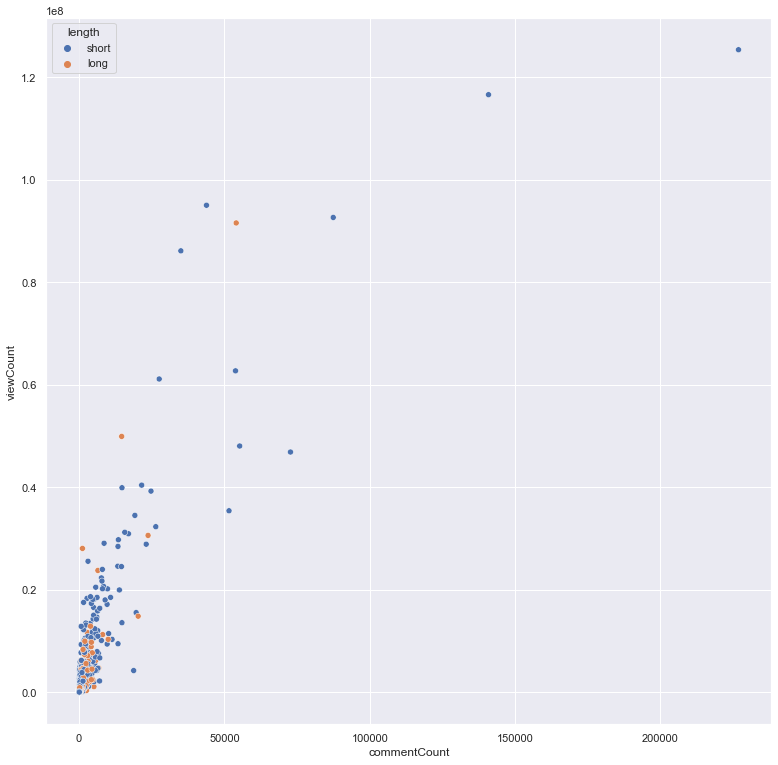

In [58]:
#views vs like on videos categories(shortvslong)
sns.scatterplot(data=dataset, x="commentCount", y="viewCount", hue="length")
sns.set_style("darkgrid")

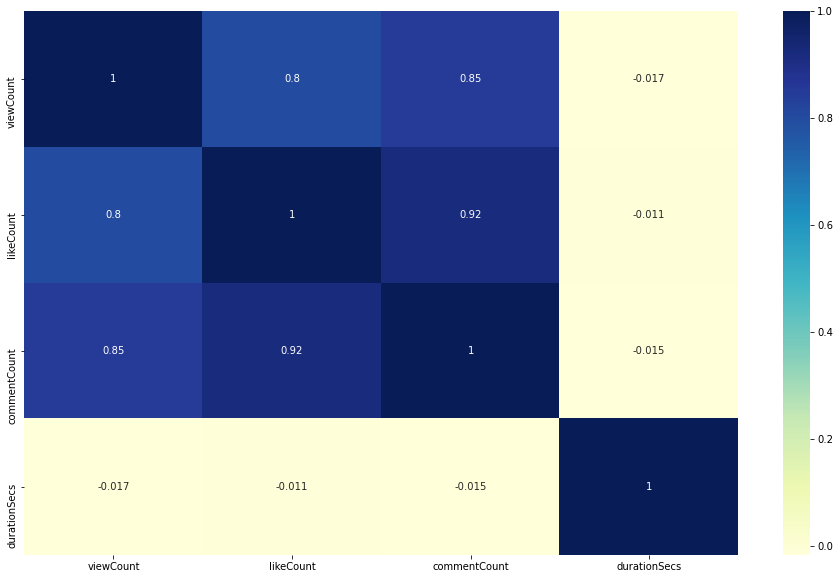

In [46]:
#lets see the correlation between the coloumns 
plt.figure(figsize = (16, 10))
sns.heatmap(dataset.corr(), annot = True, cmap="YlGnBu")
plt.show()

C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0, flags=flags)


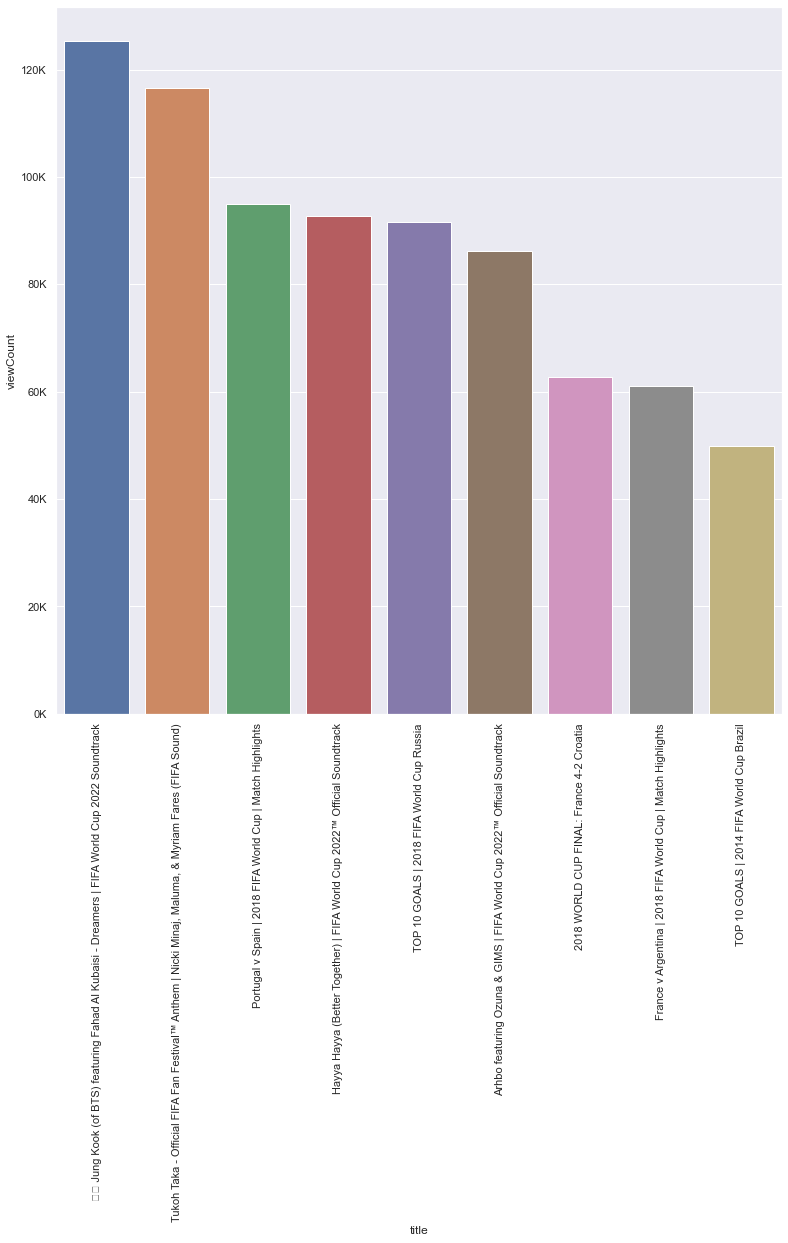

In [60]:
# most watched videos(in millions)
ax = sns.barplot(x = 'title', y = 'viewCount', data = dataset.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000000) + 'K'))


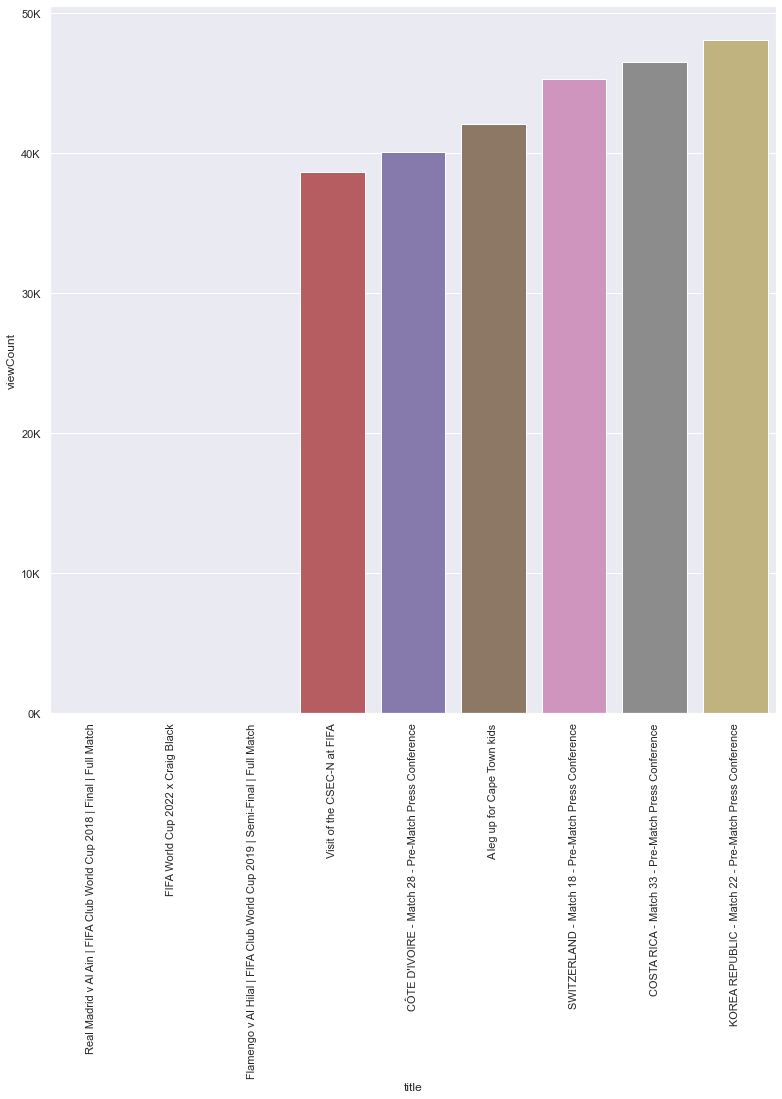

In [61]:
#less watched viedos 
ax = sns.barplot(x = 'title', y = 'viewCount', data = dataset.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/10) + 'K'))

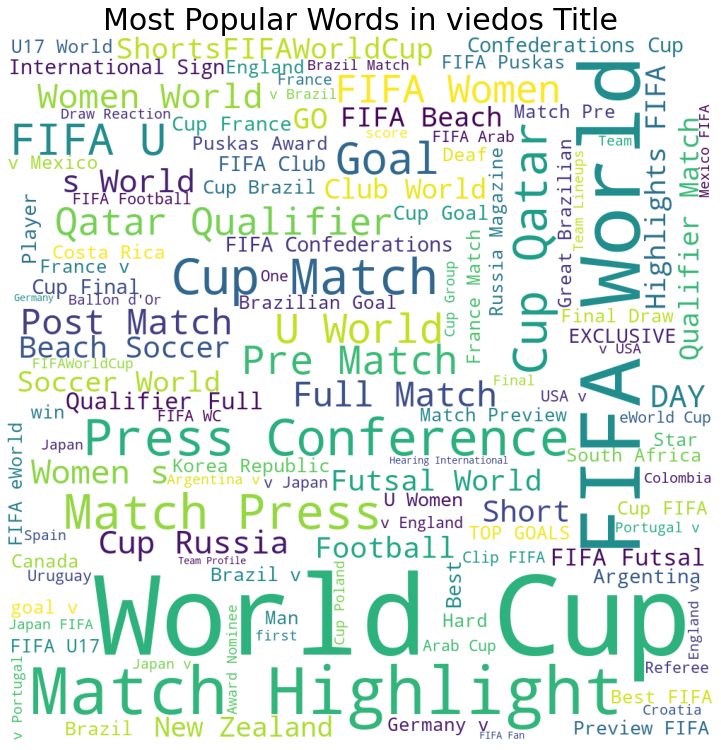

In [49]:
#lets see most common words in the title 
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 1000,  height = 1000, max_words = 121).generate(' '.join(dataset['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in viedos Title',fontsize = 30)
plt.show()

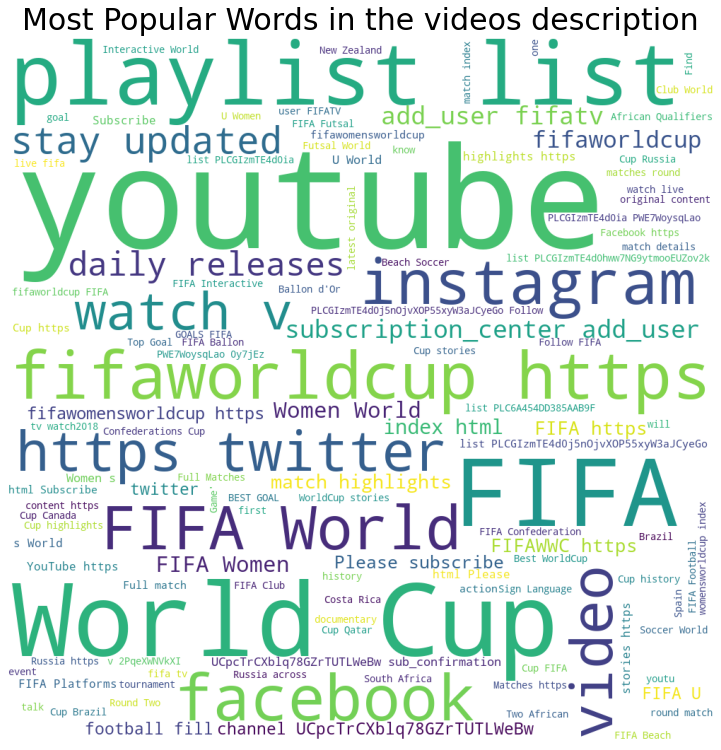

In [50]:
#lets see most common words in the title 
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white', width = 1000,  height = 1000, max_words = 121).generate(' '.join(dataset['description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in the videos description',fontsize = 30)
plt.show()

# connecting to the database MySQL

In [29]:
def connect(host_name,dbname,port,username,password):
    try:
        conn = mysql.connector.connect(host=host_name,
                                         database=dbname,
                                         user=username,
                                         password=password,
                                         port = port)
    except Error as e:
        print("Error while connecting to MySQL", e) 
       
    else:
        print('connected')
        
    return conn    

In [30]:
host_name = ''#your crdentials
dbname = 'youtube'
port = '3306'
username = ''#your crdentials
password = ''#your crdentials

In [31]:
conn = connect(host_name,dbname,port,username,password)

connected


In [33]:
#creating the tables into the database
create_table_command = """CREATE TABLE videos(
            video_id varchar(255) primary key,
            title varchar(255) not null,
            description text,
            publishedAt DATE not null,
            viewCount int(20) not null,
            likeCount int(20) ,
            commentCount int(20),
            duration varchar(255) not null,
            durationSecs int(20) not null,
            length enum ('short','long') not null
            )"""
cursor.execute(create_table_command)    

In [32]:
cursor = conn.cursor()

In [47]:
#saving the records
conn.commit()

In [46]:
cols = "`,`".join([str(i) for i in dataset.columns.tolist()])

# Insert DataFrame recrds one by one.
try:
    for i,row in dataset.iterrows():
        sql = "INSERT INTO `videos` (`" +cols + "`) VALUES (" + "%s,"*(len(row)-1) + "%s)"
        cursor.execute(sql, tuple(row))
except:
    pass  
    # the connection is not autocommitted by default, so we must commit to save our changes
#cursor = conn.cursor(buffered=True) 
conn.commit()

In [35]:
#checking the data on the pandas data frame if its exists will update the record if not will insert to the database 
def check_if_videos_exists():
        query = (""" select video_id from videos where video_id = %s""")
        cursor.execute(query,(video_id))
        return cursor.fetchone()

In [39]:
#update the data if the viedo already exist 
def update_database(cursor,dataset):
    
    for i, row in dataset.iterrows():
        if check_if_videos_exists():
             update_row(cursor,row['video_id'],row['title'],row['description'],row['publishedAt'],row['viewCount'],row['likeCount'],row['commentCount'],['duration'],['durationSecs'],['length'])
          
        dataset = dataset.append(row)
    
    return dataset
